In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from datetime import datetime,date

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
from pandas_datareader.data import DataReader

In [ ]:
stock_list = ['AXISBANK.NS','HDB','SBIN.NS','KARURVYSYA.NS']

end = datetime.now()
start = datetime(end.year-10,end.month,end.day)

for stock in stock_list:
    globals()[stock] = yf.download(stock ,start ,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
axis = globals()['AXISBANK.NS']
hdfc = globals()['HDB']
sbi = globals()['SBIN.NS']
kvb = globals()['KARURVYSYA.NS']

In [ ]:
axis.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-12,192.000000,193.300003,188.410004,191.199997,181.050034,10010140
2012-09-13,191.779999,191.979996,188.910004,189.610001,179.544434,8826270
2012-09-14,195.000000,202.600006,194.199997,201.979996,191.257782,23582675
2012-09-17,206.289993,212.199997,204.399994,211.500000,200.272400,29419030
2012-09-18,210.940002,217.089996,209.419998,214.679993,203.283585,12796780


In [ ]:
axis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2463 entries, 2012-09-12 to 2022-09-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2463 non-null   float64
 1   High       2463 non-null   float64
 2   Low        2463 non-null   float64
 3   Close      2463 non-null   float64
 4   Adj Close  2463 non-null   float64
 5   Volume     2463 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 134.7 KB


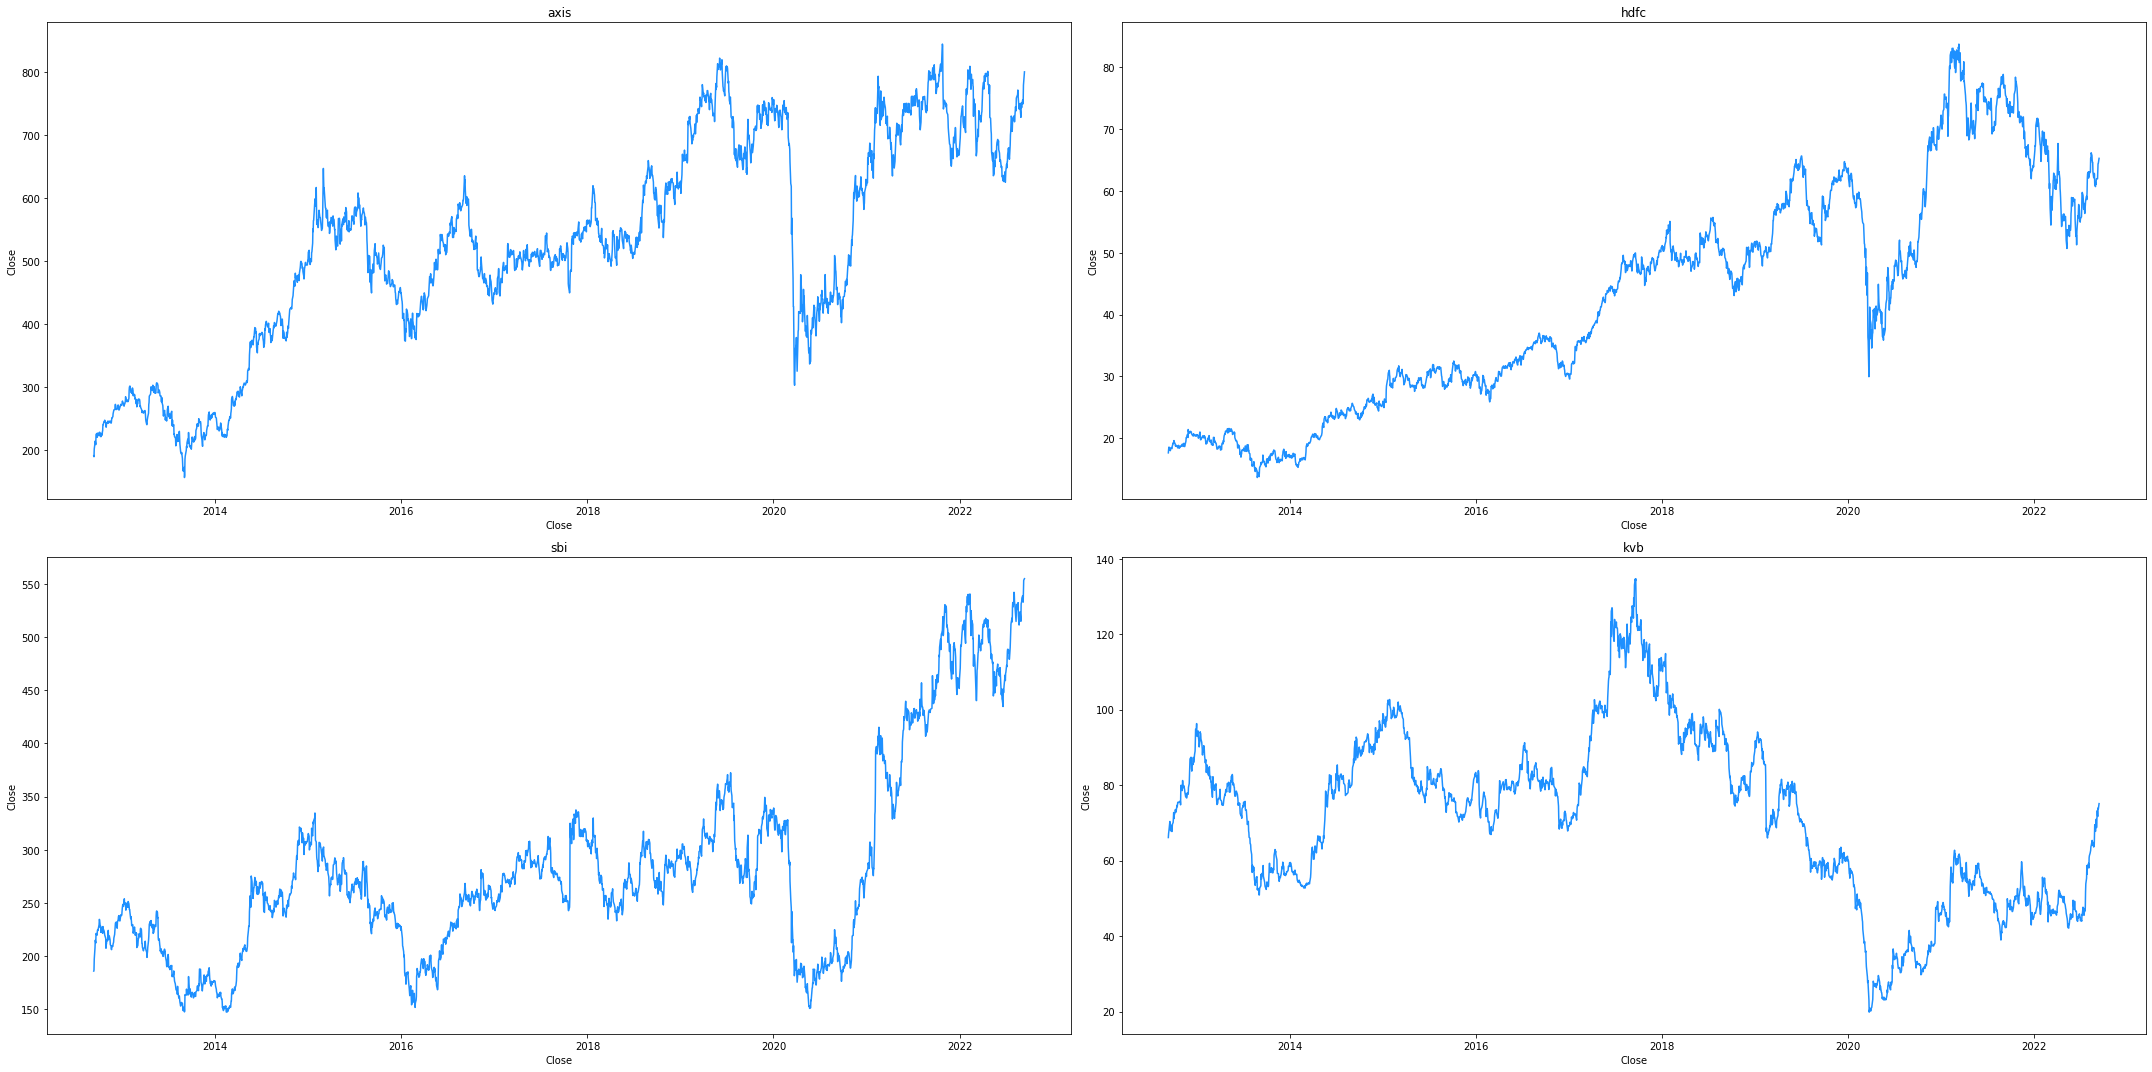

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(30,15))
#axis
sns.lineplot(x = axis.index,y=axis['Close'],ax=ax[0][0],color='dodgerblue')
ax[0][0].set_title('axis')
ax[0][0].set_xlabel(None)
ax[0][0].set_xlabel('Close')
# hdfc
sns.lineplot(x = hdfc.index,y=hdfc['Close'],ax=ax[0][1],color='dodgerblue')
ax[0][1].set_title('hdfc')
ax[0][1].set_xlabel(None)
ax[0][1].set_xlabel('Close')
# sbi
sns.lineplot(x = sbi.index,y=sbi['Close'],ax=ax[1][0],color='dodgerblue')
ax[1][0].set_title('sbi')
ax[1][0].set_xlabel(None)
ax[1][0].set_xlabel('Close')
# kvb
sns.lineplot(x = kvb.index,y=kvb['Close'],ax=ax[1][1],color='dodgerblue')
ax[1][1].set_title('kvb')
ax[1][1].set_xlabel(None)
ax[1][1].set_xlabel('Close')

plt.tight_layout()

### volume of stocks each day

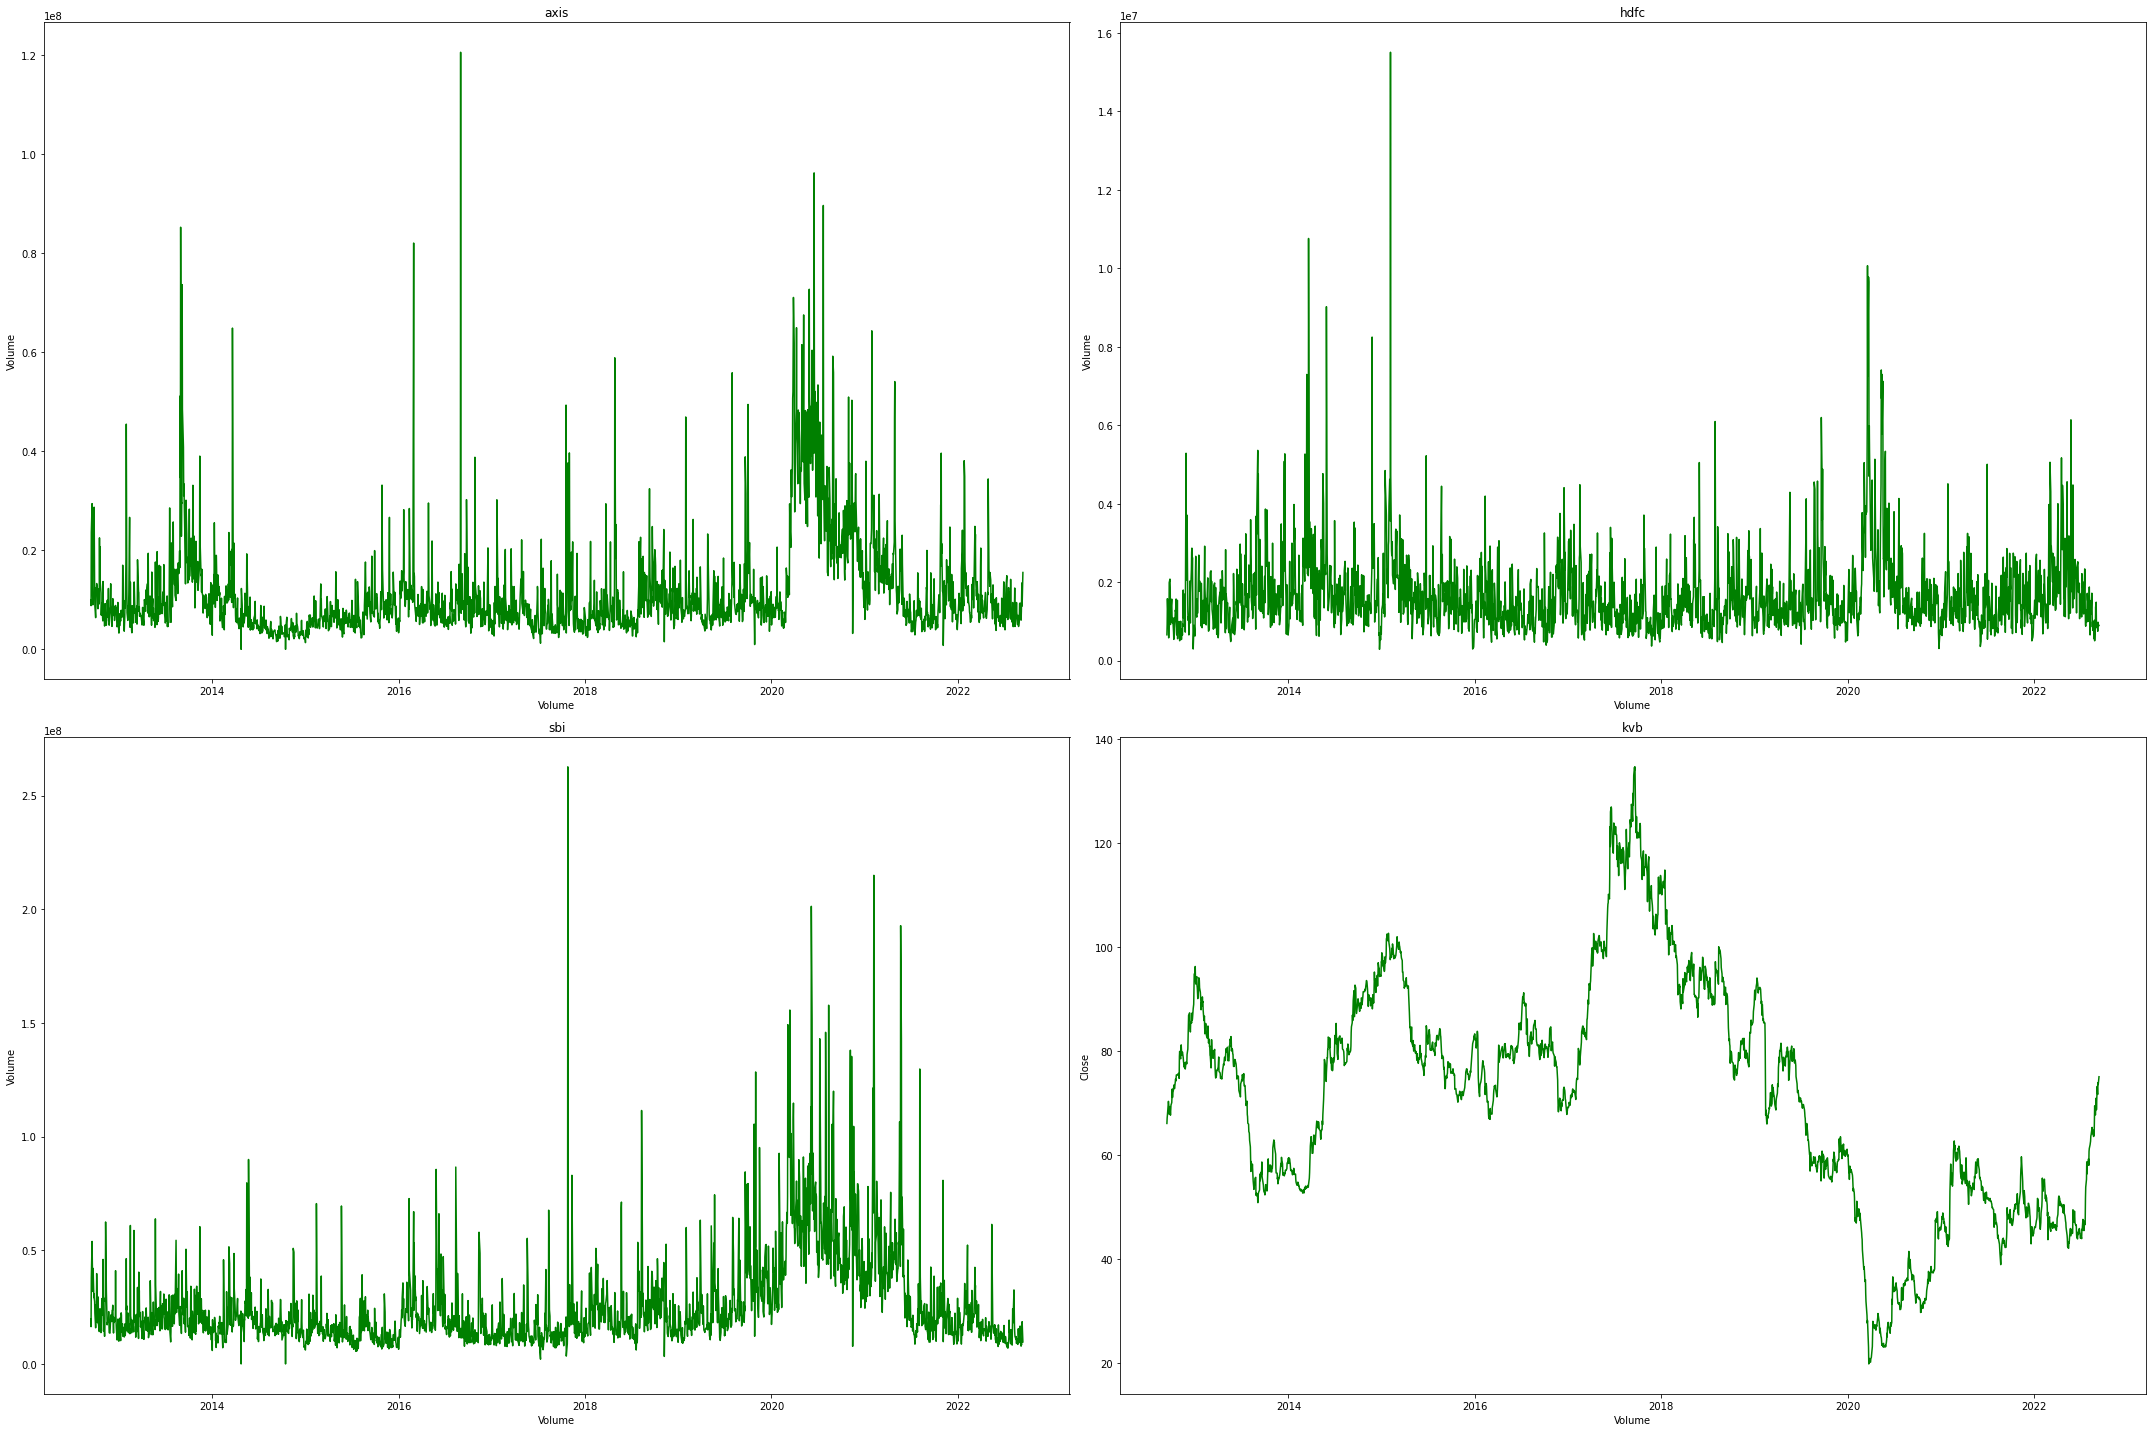

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(30,20))
#axis
sns.lineplot(x = axis.index,y=axis['Volume'],ax=ax[0][0],color='green')
ax[0][0].set_title('axis')
ax[0][0].set_xlabel(None)
ax[0][0].set_xlabel('Volume')
# hdfc
sns.lineplot(x = hdfc.index,y=hdfc['Volume'],ax=ax[0][1],color='green')
ax[0][1].set_title('hdfc')
ax[0][1].set_xlabel(None)
ax[0][1].set_xlabel('Volume')
# sbi
sns.lineplot(x = sbi.index,y=sbi['Volume'],ax=ax[1][0],color='green')
ax[1][0].set_title('sbi')
ax[1][0].set_xlabel(None)
ax[1][0].set_xlabel('Volume')
# kvb
sns.lineplot(x = kvb.index,y=kvb['Close'],ax=ax[1][1],color='green')
ax[1][1].set_title('kvb')
ax[1][1].set_xlabel(None)
ax[1][1].set_xlabel('Volume')

plt.tight_layout()

In [ ]:
ma = [10,20,30]

for i in ma:
    column_name = "MA for {ma}".format(ma=i)
    axis[column_name] = axis['Close'].rolling(i).mean()
    hdfc[column_name] = hdfc['Close'].rolling(i).mean()
    sbi[column_name] = sbi['Close'].rolling(i).mean()
    kvb[column_name] = kvb['Close'].rolling(i).mean()

In [ ]:
axis.tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 10,MA for 20,MA for 30
Date,,,,,,,,,
2022-09-06,758.000000,761.549988,748.799988,750.000000,750.000000,7606181,746.610004,749.984998,741.573332
2022-09-07,743.150024,758.000000,739.049988,755.400024,755.400024,10156460,747.445007,751.329999,742.394999
2022-09-08,761.750000,782.200012,757.099976,779.750000,779.750000,13410790,750.405005,753.039999,744.141667
2022-09-09,787.950012,787.950012,780.000000,784.849976,784.849976,8732302,754.555005,755.332498,746.754999
2022-09-12,789.000000,805.000000,786.799988,801.000000,801.000000,15519545,760.165002,757.439999,749.489998


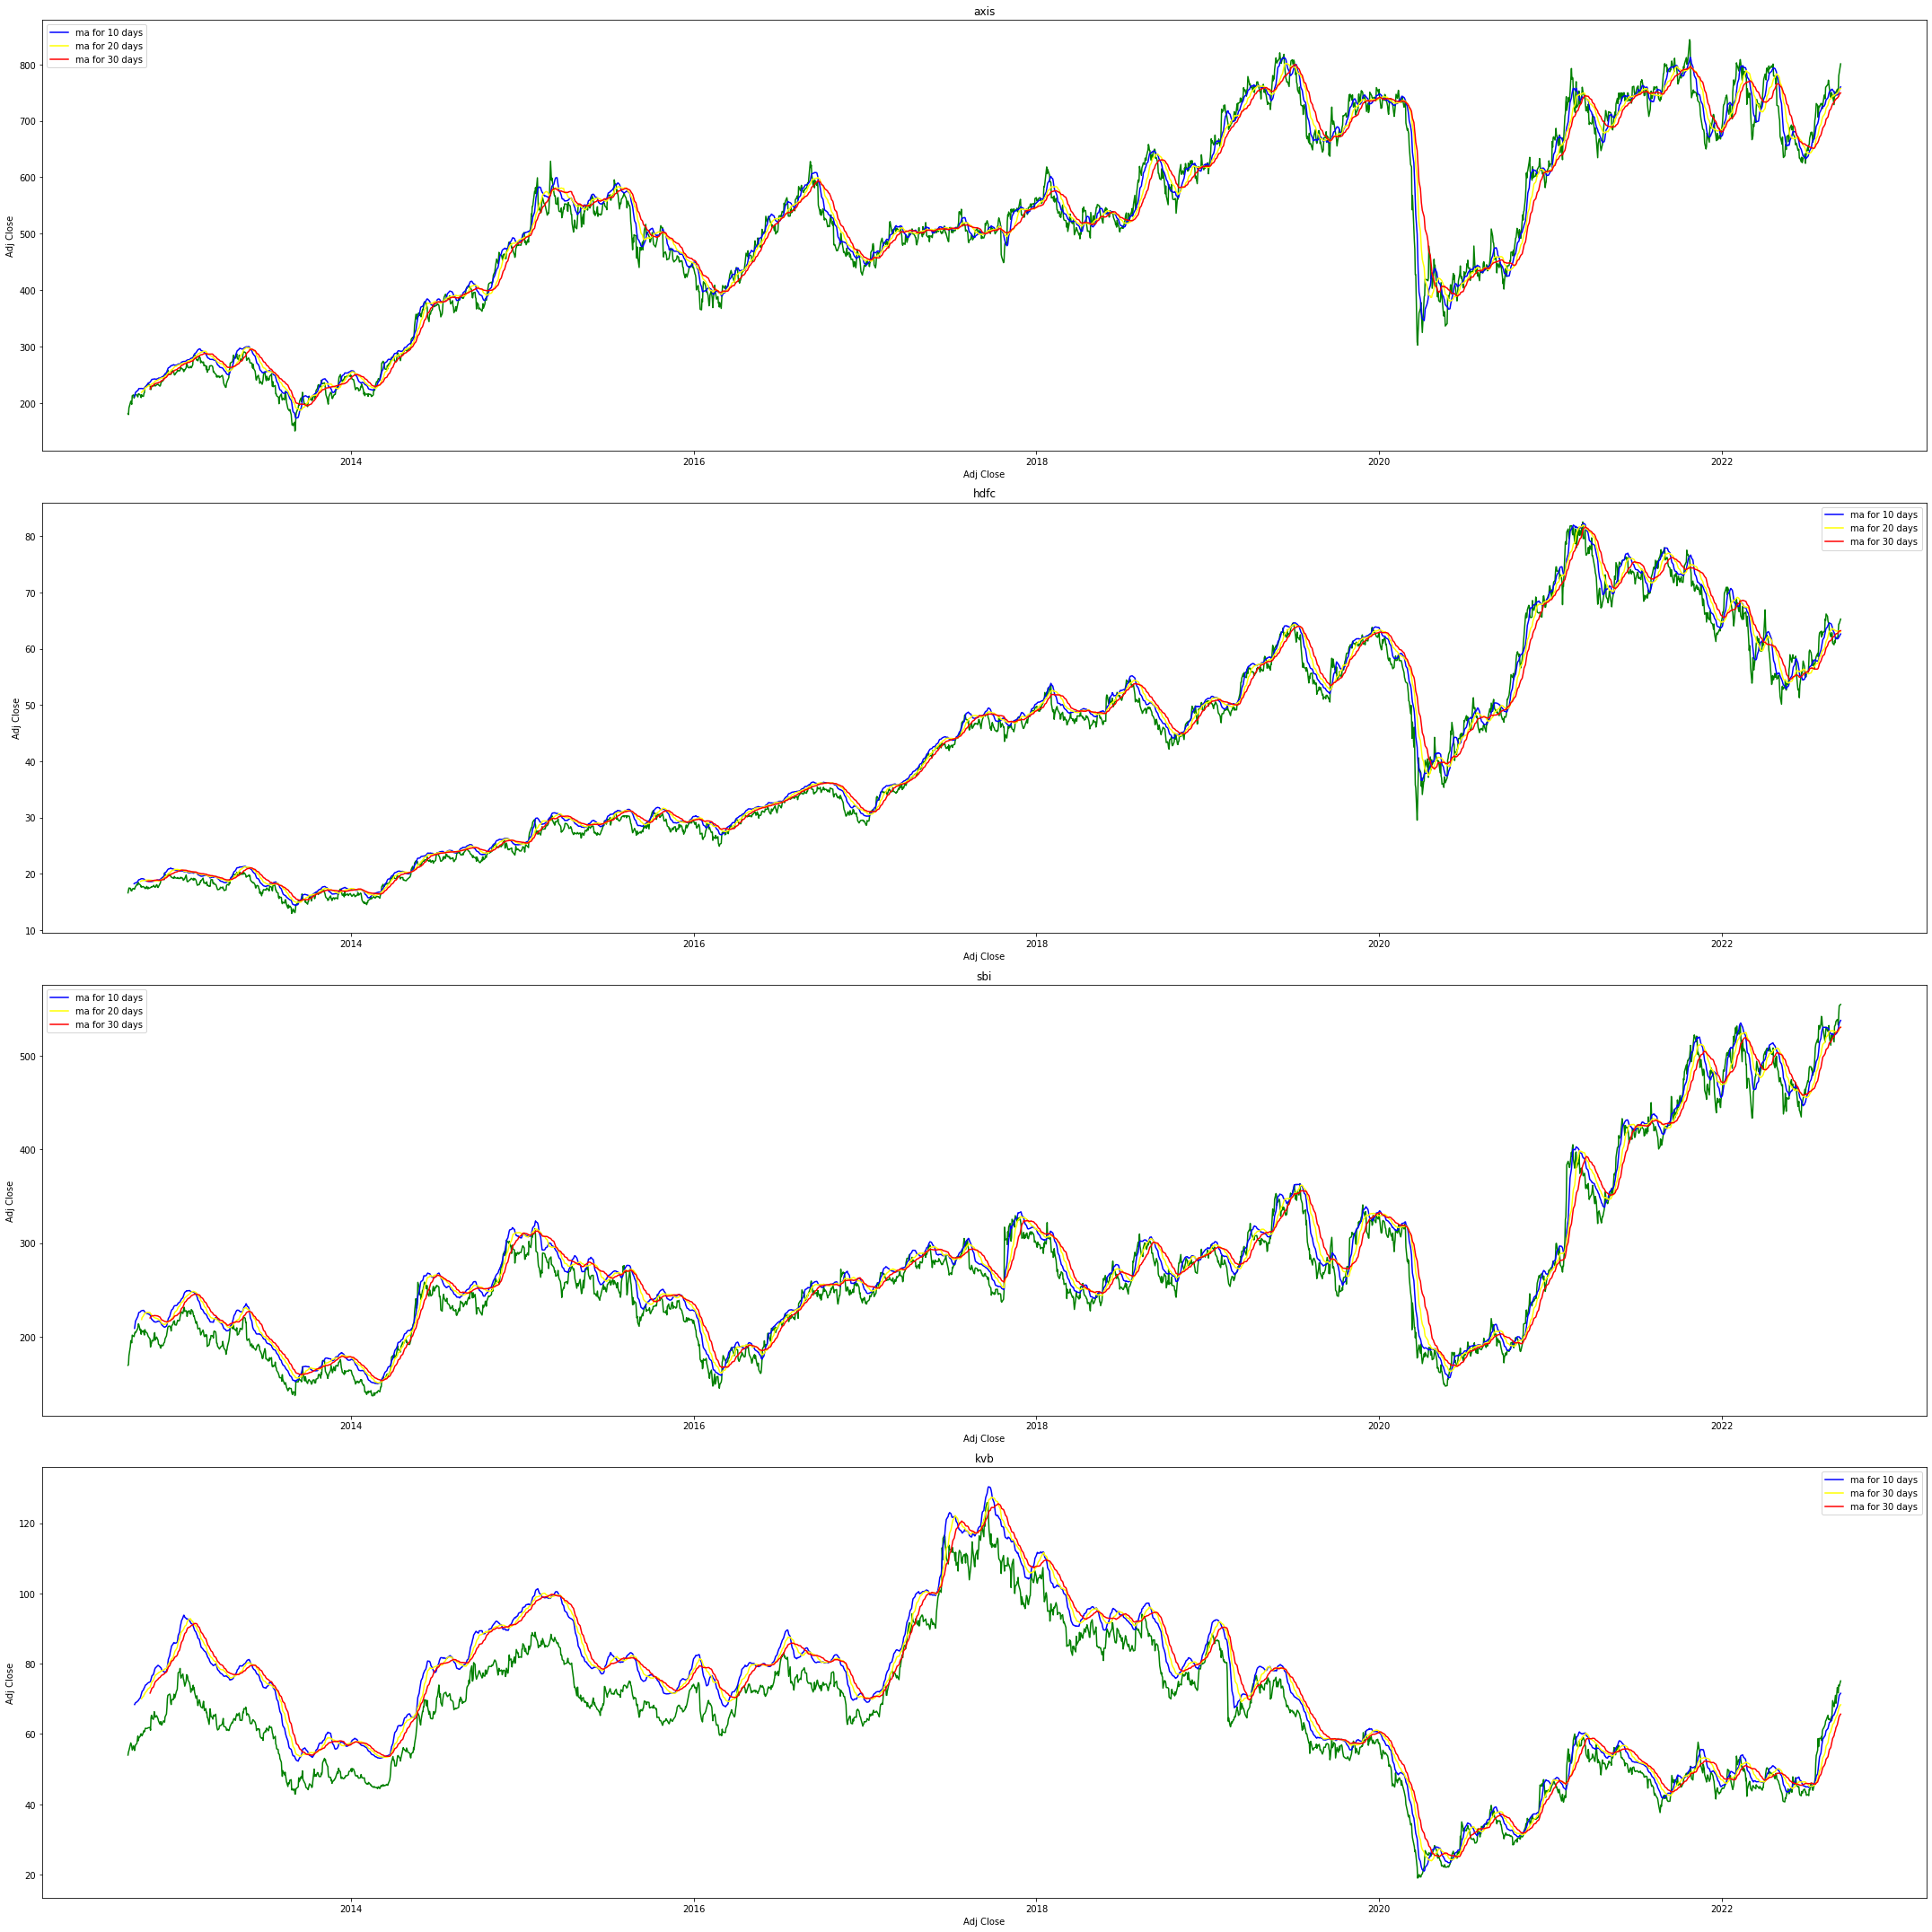

In [ ]:
fig,ax = plt.subplots(4,1,figsize=(30,30))
#axis
sns.lineplot(x = axis.index,y=axis['Adj Close'],ax=ax[0],color='green')
sns.lineplot(x = axis.index,y=axis['MA for 10'],ax=ax[0],color='blue',label='ma for 10 days')
sns.lineplot(x =axis.index,y=axis['MA for 20'],ax=ax[0],color='yellow',label='ma for 20 days')
sns.lineplot(x = axis.index,y=axis['MA for 30'],ax=ax[0],color='red',label='ma for 30 days')
ax[0].set_title('axis')
ax[0].set_xlabel(None)
ax[0].set_xlabel('Adj Close')
# hdfc
sns.lineplot(x = hdfc.index,y=hdfc['Adj Close'],ax=ax[1],color='green')
sns.lineplot(x = hdfc.index,y=hdfc['MA for 10'],ax=ax[1],color='blue',label='ma for 10 days')
sns.lineplot(x =hdfc.index,y=hdfc['MA for 20'],ax=ax[1],color='yellow',label='ma for 20 days')
sns.lineplot(x = hdfc.index,y=hdfc['MA for 30'],ax=ax[1],color='red',label='ma for 30 days')
ax[1].set_title('hdfc')
ax[1].set_xlabel(None)
ax[1].set_xlabel('Adj Close')
# sbi
sns.lineplot(x = sbi.index,y=sbi['Adj Close'],ax=ax[2],color='green')
sns.lineplot(x = sbi.index,y=sbi['MA for 10'],ax=ax[2],color='blue',label='ma for 10 days')
sns.lineplot(x =sbi.index,y=sbi['MA for 20'],ax=ax[2],color='yellow',label='ma for 20 days')
sns.lineplot(x = sbi.index,y=sbi['MA for 30'],ax=ax[2],color='red',label='ma for 30 days')
ax[2].set_title('sbi')
ax[2].set_xlabel(None)
ax[2].set_xlabel('Adj Close')
# kvb
sns.lineplot(x = kvb.index,y=kvb['Adj Close'],ax=ax[3],color='green')
sns.lineplot(x = kvb.index,y=kvb['MA for 10'],ax=ax[3],color='blue',label='ma for 10 days')
sns.lineplot(x =kvb.index,y=kvb['MA for 20'],ax=ax[3],color='yellow',label='ma for 30 days')
sns.lineplot(x = kvb.index,y=kvb['MA for 30'],ax=ax[3],color='red',label='ma for 30 days')
ax[3].set_title('kvb')
ax[3].set_xlabel(None)
ax[3].set_xlabel('Adj Close')

plt.tight_layout()

#### inorder to vizualize the risk involved we calculate percentage change

In [ ]:
axis['Daily return'] = axis['Adj Close'].pct_change()
hdfc['Daily return'] = hdfc['Adj Close'].pct_change()
sbi['Daily return'] = sbi['Adj Close'].pct_change()
kvb['Daily return'] = kvb['Adj Close'].pct_change()

kvb.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10,MA for 20,MA for 30,Daily return
Date,,,,,,,,,,
2012-09-12,65.893768,66.351128,65.554977,66.113976,53.996017,108215,NaN,NaN,NaN,NaN
2012-09-13,66.893181,67.579224,65.834480,67.164215,54.853764,385435,NaN,NaN,NaN,0.015885
2012-09-14,67.757088,68.146690,67.274315,67.714737,55.303368,317315,NaN,NaN,NaN,0.008196
2012-09-17,68.172096,69.959190,68.163628,69.789803,56.998108,399326,NaN,NaN,NaN,0.030644
2012-09-18,70.297974,70.636765,68.942833,70.365730,57.468472,235151,NaN,NaN,NaN,0.008252


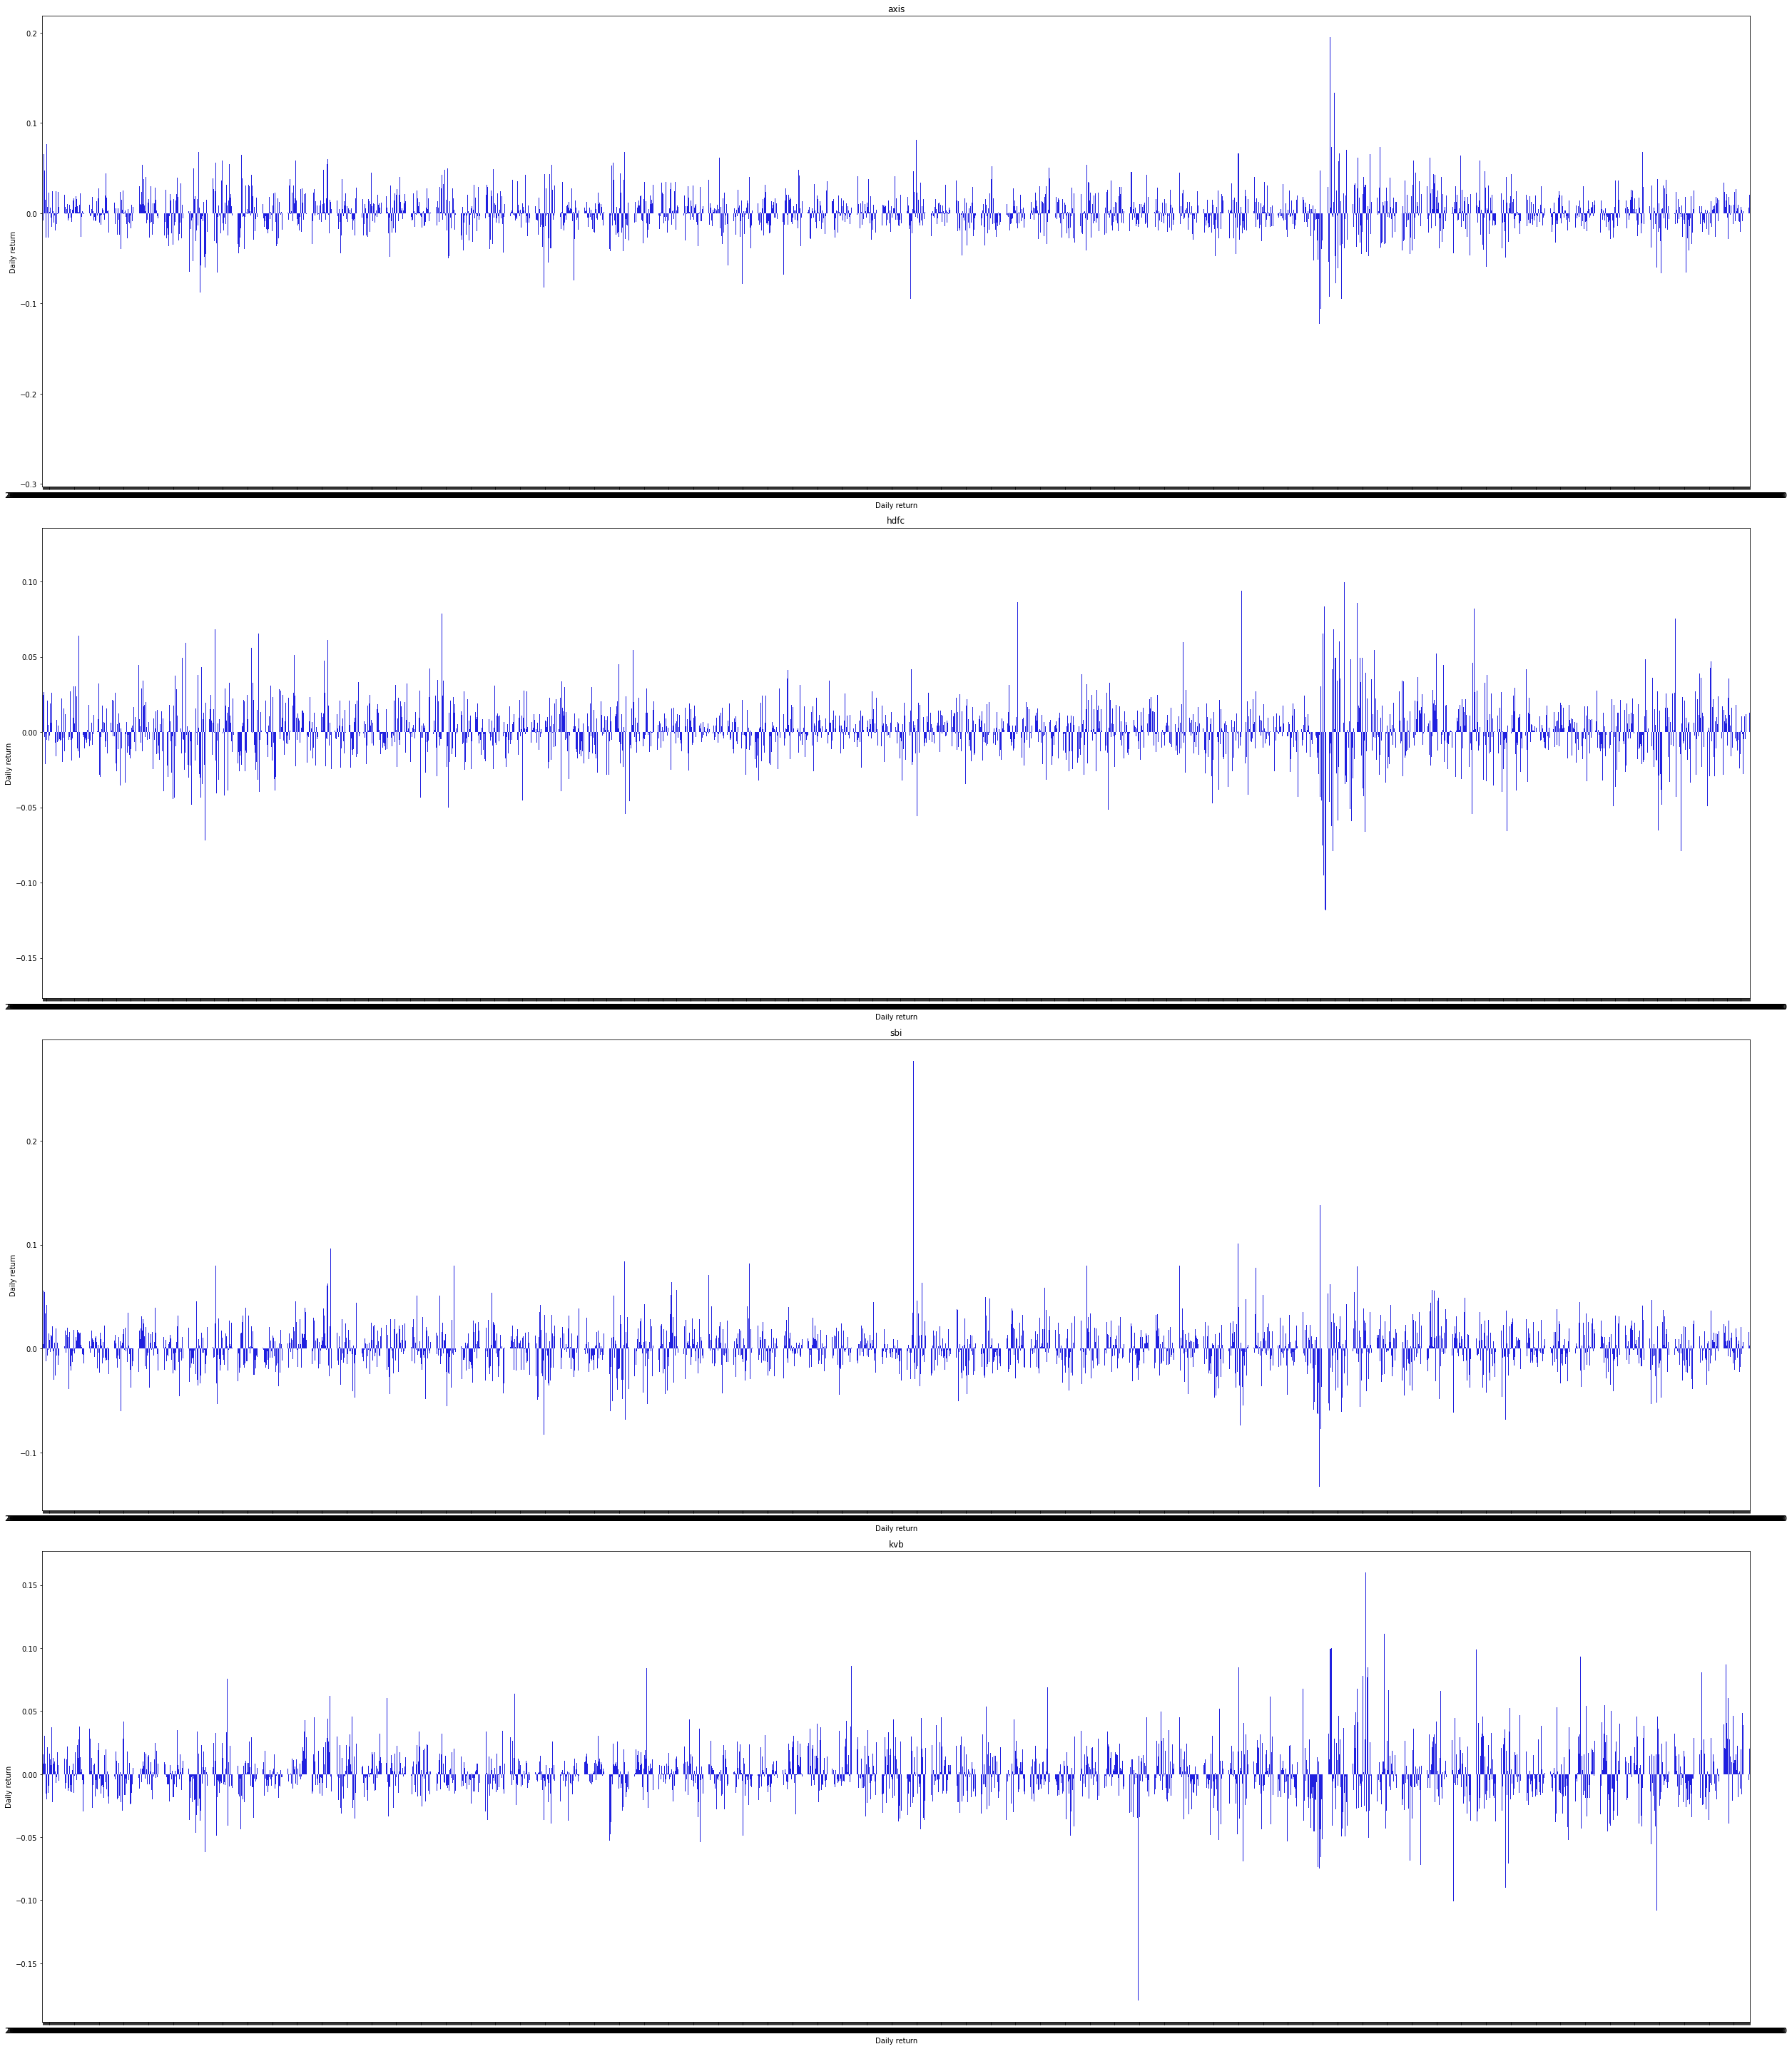

In [ ]:
fig,ax = plt.subplots(4,1,figsize=(35,40))
#axis
sns.barplot(x = axis.index,y=axis['Daily return'],ax=ax[0],color='blue')
ax[0].set_title('axis')
ax[0].set_xlabel(None)
ax[0].set_xlabel('Daily return')
# hdfc
sns.barplot(x = hdfc.index,y=hdfc['Daily return'],ax=ax[1],color='blue')
ax[1].set_title('hdfc')
ax[1].set_xlabel(None)
ax[1].set_xlabel('Daily return')
# sbi
sns.barplot(x = sbi.index,y=sbi['Daily return'],ax=ax[2],color='blue')
ax[2].set_title('sbi')
ax[2].set_xlabel(None)
ax[2].set_xlabel('Daily return')
# kvb
sns.barplot(x = kvb.index,y=kvb['Daily return'],ax=ax[3],color='blue')
ax[3].set_title('kvb')
ax[3].set_xlabel(None)
ax[3].set_xlabel('Daily return')

plt.tight_layout()

### to get distribution of returns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

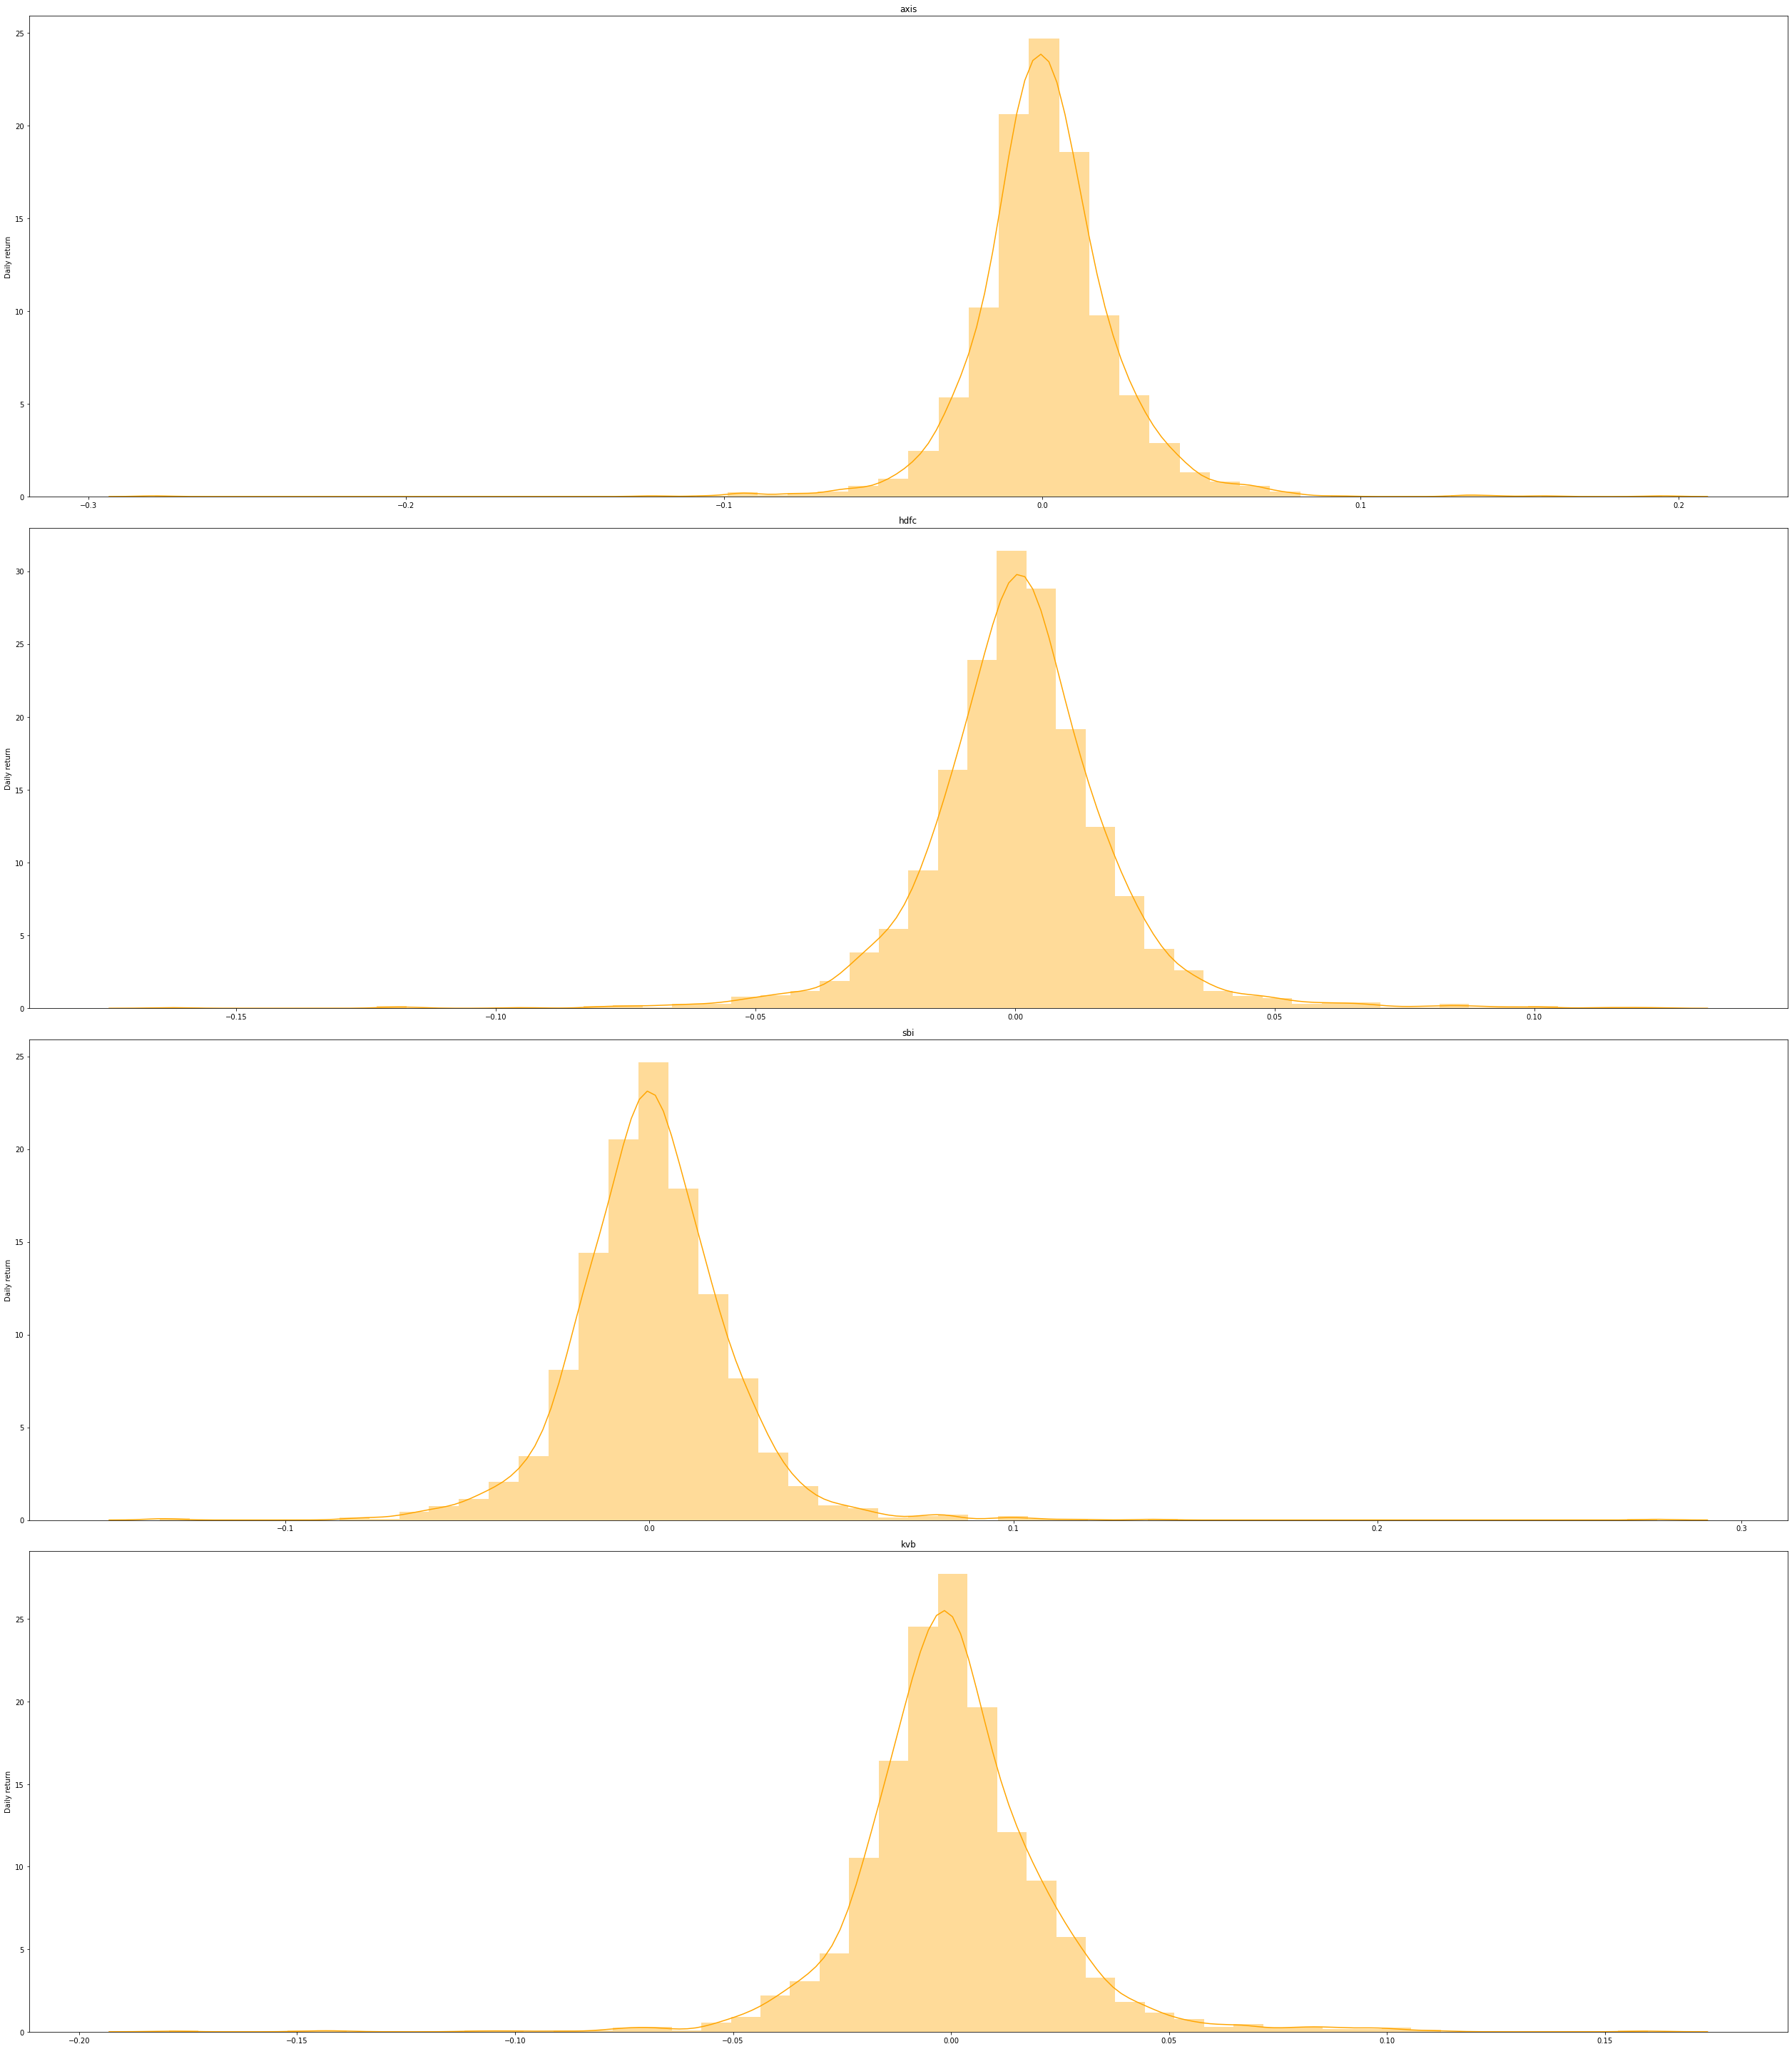

In [ ]:
fig,ax = plt.subplots(4,1,figsize=(35,40))
#axis
sns.distplot(x=axis['Daily return'],ax=ax[0],color='orange')
ax[0].set_title('axis')
ax[0].set_xlabel(None)
ax[0].set_ylabel('Daily return')
# hdfc
sns.distplot(x = hdfc['Daily return'],ax=ax[1],color='orange')
ax[1].set_title('hdfc')
ax[1].set_xlabel(None)
ax[1].set_ylabel('Daily return')
# sbi
sns.distplot(x = sbi['Daily return'],ax=ax[2],color='orange')
ax[2].set_title('sbi')
ax[2].set_xlabel(None)
ax[2].set_ylabel('Daily return')
# kvb
sns.distplot(x =kvb['Daily return'],ax=ax[3],color='orange')
ax[3].set_title('kvb')
ax[3].set_xlabel(None)
ax[3].set_ylabel('Daily return')

plt.tight_layout()

monte carlo prediction can be done to analyze about the risks.

### correlation between all stocks

In [ ]:
close_stocks = pd.DataFrame({'AXIS':axis['Close'],'HDFC':hdfc['Close'],'SBI':sbi['Close'],'KVB':kvb['Close']})
close_stocks.head()

,AXIS,HDFC,SBI,KVB
Date,,,,
2012-09-12,191.199997,17.650000,185.940002,66.113976
2012-09-13,189.610001,18.084999,186.759995,67.164215
2012-09-14,201.979996,18.570000,197.149994,67.714737
2012-09-17,211.500000,18.510000,207.955002,69.789803
2012-09-18,214.679993,18.115000,214.945007,70.365730


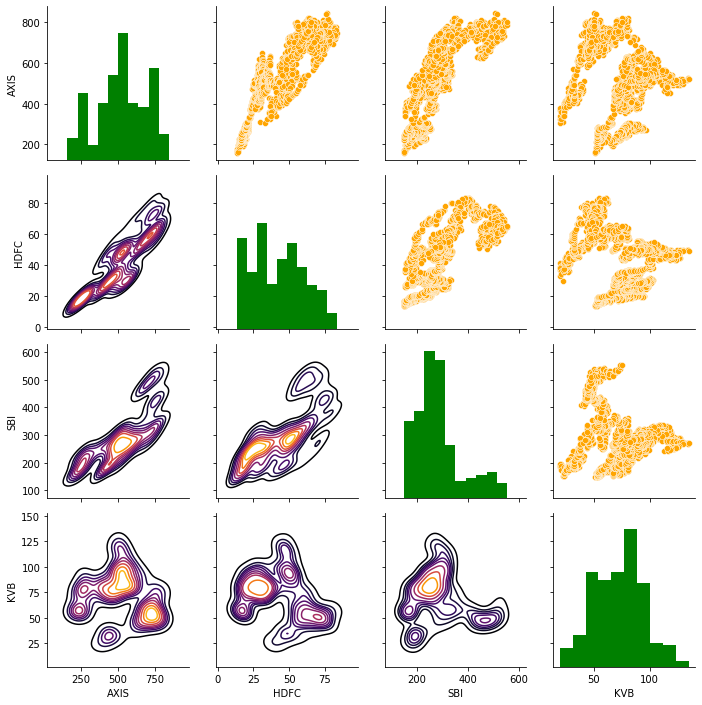

In [ ]:
fig = sns.PairGrid(close_stocks)
fig.map_diag(plt.hist,color='green')
fig.map_upper(sns.scatterplot,color='orange')
fig.map_lower(sns.kdeplot,cmap='inferno')

# MODEL 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
axis_stock = scale.fit_transform(np.array(axis['Close']).reshape(-1,1))
axis_stock


array([[0.05029554],
       [0.04798628],
       [0.06595209],
       ...,
       [0.90508768],
       [0.91249473],
       [0.93595054]])

In [ ]:
train_len = int(len(axis_stock)*.65)
test_len = len(axis_stock) - train_len
train_len,test_len

(1600, 863)

In [ ]:
train,test = axis_stock[:train_len],axis_stock[train_len:]
train.shape,test.shape

((1600, 1), (863, 1))

periodic values for very nth step:

In [ ]:
def convert_series(input,steps):
  X_set,y_set = [],[]
  for i in range(len(input)-steps-1):
    X_set.append(input[i:(i+steps),0])
    y_set.append(input[i+steps,0])
  return np.array(X_set),np.array(y_set)

In [ ]:
X_train,y_train = convert_series(train,100)
X_test,y_test = convert_series(test,100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1499, 100)
(762, 100)
(1499,)
(762,)


Formatting data is completed 

LSTM

In [ ]:
import tensorflow as tf

In [ ]:
lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(128,return_sequences=True,input_shape=(100,1))  ,
    tf.keras.layers.LSTM(64,activation='relu'),
    tf.keras.layers.Dense(25,activation='relu'),
   
    tf.keras.layers.Dense(1,activation=None)                    
])

lstm.compile(loss=tf.keras.losses.mse,optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['mse'])

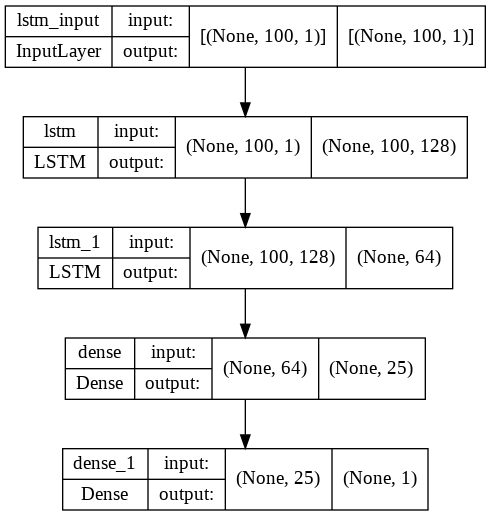

In [ ]:

tf.keras.utils.plot_model(model=lstm,show_shapes=True)

In [ ]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
x_test =  X_test.reshape(X_test.shape[0],X_test.shape[1],1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(762, 100, 1)
(1499, 100, 1)
(762, 1)
(1499, 1)


In [ ]:
x_train = tf.constant(x_train,dtype=tf.float32)
y_train = tf.constant(y_train,dtype=tf.float32)
x_test = tf.constant(x_test,dtype=tf.float32)
y_test = tf.constant(y_test,dtype=tf.float32)

In [ ]:
y_train.shape

TensorShape([1499, 1])

In [ ]:
lstm_history = lstm.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=20,verbose=1)

Epoch 1/20
24/24 [==============================] - 10s 306ms/step - loss: 0.1901 - mse: 0.1901 - val_loss: 0.3794 - val_mse: 0.3794
Epoch 2/20
24/24 [==============================] - 7s 274ms/step - loss: 0.1050 - mse: 0.1050 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 3/20
24/24 [==============================] - 7s 274ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4/20
24/24 [==============================] - 7s 274ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 5/20
24/24 [==============================] - 7s 273ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 6/20
24/24 [==============================] - 7s 275ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 7/20
24/24 [==============================] - 6s 271ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 8/20
24/24 [==============================] - 7s 273ms/step - loss: 0

In [ ]:
pd.DataFrame(lstm_history.history)

,loss,mse,val_loss,val_mse
0,0.190052,0.190052,0.379371,0.379371
1,0.105025,0.105025,0.048986,0.048986
2,0.007022,0.007022,0.007365,0.007365
3,0.002122,0.002122,0.006199,0.006199
4,0.001861,0.001861,0.006486,0.006486
5,0.001777,0.001777,0.007084,0.007084
6,0.001743,0.001743,0.007021,0.007021
7,0.001712,0.001712,0.007400,0.007400
8,0.001693,0.001693,0.006937,0.006937
9,0.001664,0.001664,0.007623,0.007623


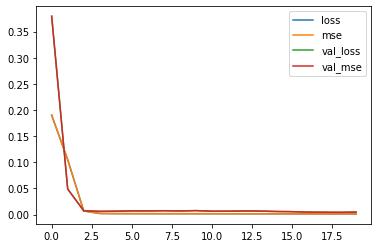

In [ ]:
pd.DataFrame(lstm_history.history).plot()

In [ ]:
y_predict = lstm.predict(x_test)
y_predict.shape

(762, 1)

In [ ]:
y_predict = scale.inverse_transform(y_predict)


In [ ]:
y_test = np.array(y_test)
y_test.shape

(762, 1)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predict)
rmse = mse**(1/2)
rmse

643.3118411781335

In [ ]:
y_test = scale.inverse_transform(y_test.reshape(-1,1))

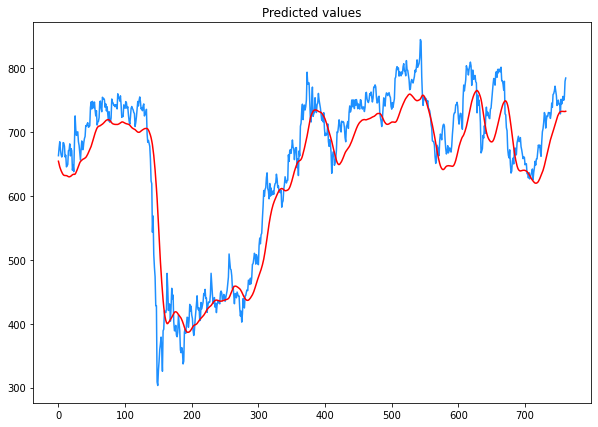

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(y_test,color='dodgerblue',label='original')
plt.plot(y_predict,color='red',label='predicted')
plt.title('Predicted values')
plt.show()

In [ ]:
axis['Predicted']=np.nan
axis['Predicted'][train_len+101:] = y_predict.reshape(-1)
axis.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,High,Low,Close,Adj Close,Volume,MA for 10,MA for 20,MA for 30,Daily return,Predicted
Date,,,,,,,,,,,
2022-09-06,758.000000,761.549988,748.799988,750.000000,750.000000,7606181,746.610004,749.984998,741.573332,-0.008068,732.547546
2022-09-07,743.150024,758.000000,739.049988,755.400024,755.400024,10156460,747.445007,751.329999,742.394999,0.007200,732.517456
2022-09-08,761.750000,782.200012,757.099976,779.750000,779.750000,13410790,750.405005,753.039999,744.141667,0.032235,732.410095
2022-09-09,787.950012,787.950012,780.000000,784.849976,784.849976,8732302,754.555005,755.332498,746.754999,0.006541,732.352112
2022-09-12,789.000000,805.000000,786.799988,801.000000,801.000000,15519545,760.165002,757.439999,749.489998,0.020577,732.807922


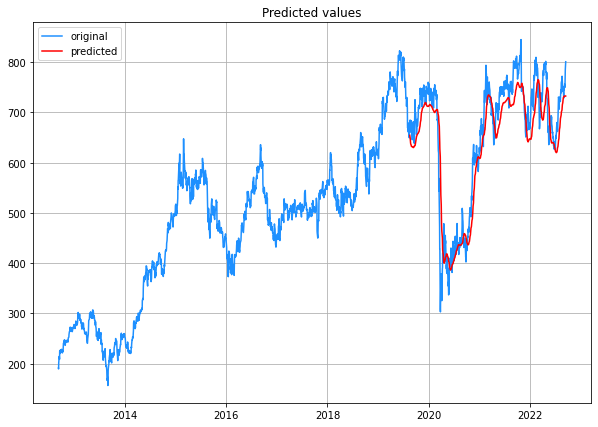

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(axis['Close'],color='dodgerblue',label='original')
plt.plot(axis['Predicted'],color='red',label='predicted')
plt.title('Predicted values')
plt.grid()
plt.legend()
plt.show()